In [99]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)


In [100]:
logging.info('Importing the Dataset for Model Building')

In [101]:
url = 'https://raw.githubusercontent.com/meet-vasita/Cement_Compressive_Strength_Prediction_Model/refs/heads/main/Dataset/Concrete_Data.csv'
df = pd.read_csv(url)

In [102]:
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
977,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
512,424.0,22.0,132.0,168.0,8.9,822.0,750.0,3,32.11
891,151.0,0.0,185.0,167.0,16.0,1074.0,678.0,28,13.46
734,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,90,40.66
501,491.0,26.0,123.0,210.0,3.9,882.0,699.0,3,25.61
...,...,...,...,...,...,...,...,...,...
248,238.1,0.0,94.1,186.7,7.0,949.9,847.0,100,44.30
888,153.0,145.0,0.0,178.0,8.0,1000.0,822.0,28,19.01
758,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
203,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,100,40.57


In [103]:
df.shape

(1030, 9)

In [104]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [105]:
import statsmodels.api as sm #Ordinary Least Square
#Independent Column
X = df.drop(columns='Concrete compressive strength(MPa, megapascals) ', axis=1)
#Dependent Column : Target Column
y = df['Concrete compressive strength(MPa, megapascals) ']

In [106]:
X = sm.add_constant(X)

In [107]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:11:05   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#Cheking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [109]:
#Checking the descriptive statistics 
#Univariate Analysis

from  collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    #Saving all OrderDict Dictionary into Dataframe: Structured Format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [110]:
'''
Note : 
Positive Skewness : Mode < Median < Mean
Negative Skewness : Mean > Median > Mode
No Skewness/Normal Distributed : Mean = Median = Mode

....................................

Note :
Positive Kurtosis : LeptoKurtic
Normal Kurtosis : Mesokurtic
Negative Kurtosis : Platykurtic
'''

'\nNote : \nPositive Skewness : Mode < Median < Mean\nNegative Skewness : Mean > Median > Mode\nNo Skewness/Normal Distributed : Mean = Median = Mode\n\n....................................\n\nNote :\nPositive Kurtosis : LeptoKurtic\nNormal Kurtosis : Mesokurtic\nNegative Kurtosis : Platykurtic\n'

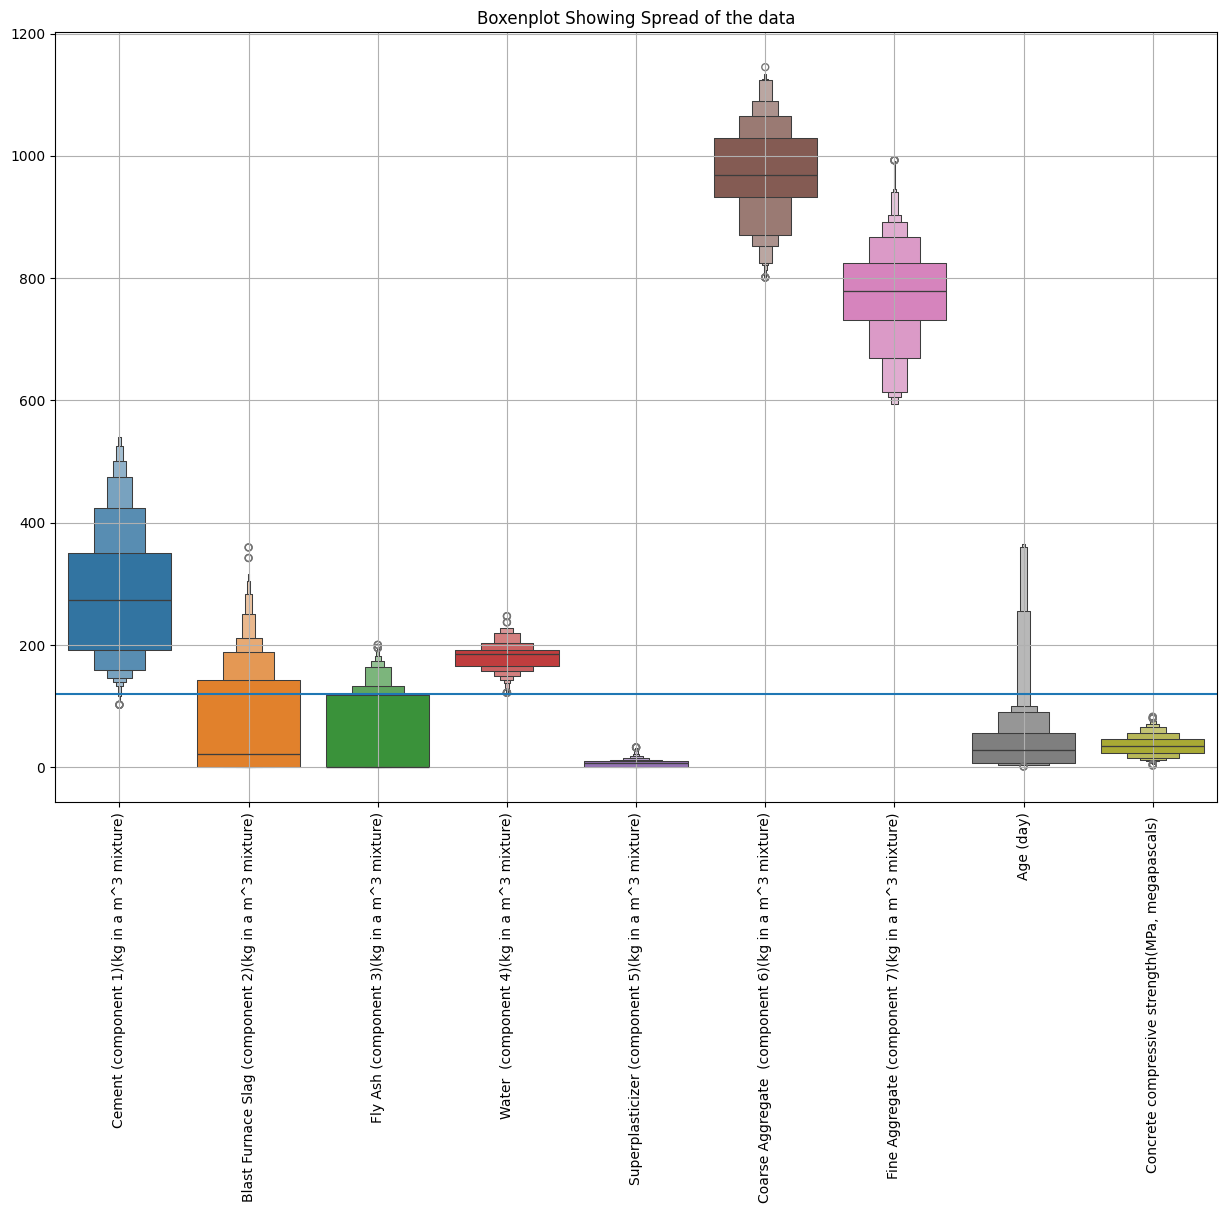

In [111]:
plt.figure(figsize=(15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation=90)
plt.title('Boxenplot Showing Spread of the data')
plt.grid()
plt.show()

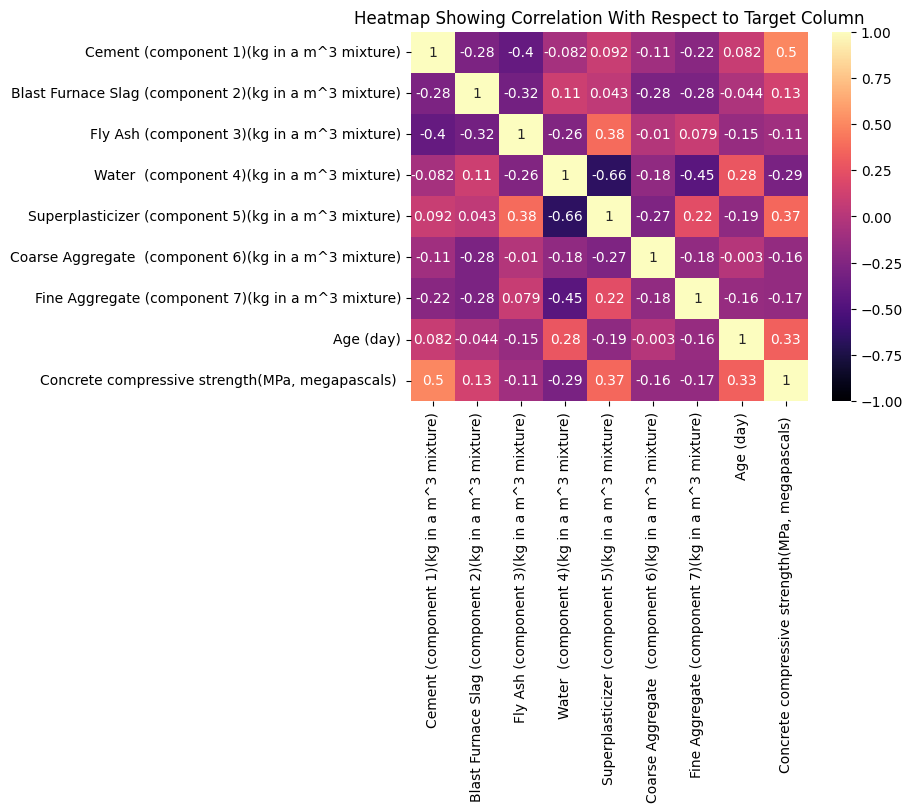

In [112]:
sns.heatmap(df.corr(),annot=True,center=0,vmax=1,vmin=-1,cmap='magma')
plt.title('Heatmap Showing Correlation With Respect to Target Column')
plt.show()

In [113]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

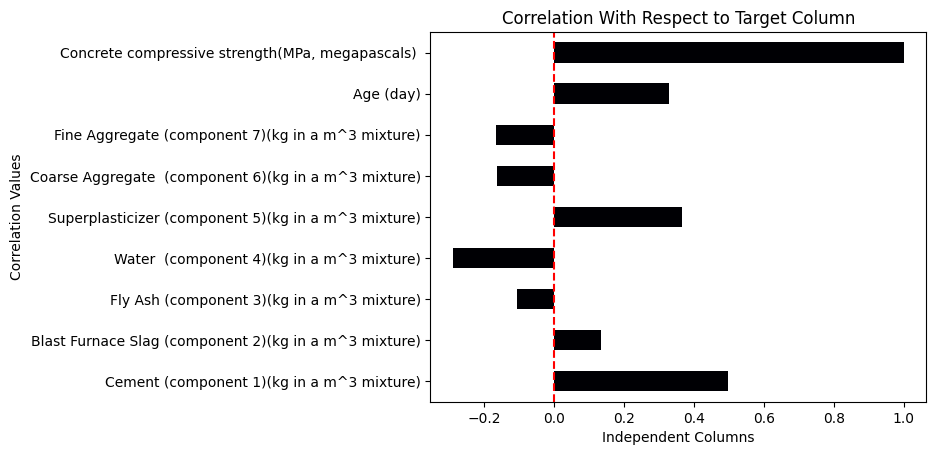

In [114]:
#This Graph shows the correlation of all the columns with respect to target column
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind='barh',cmap='magma')
plt.axvline(0,linestyle='--',color='red')
plt.title('Correlation With Respect to Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

# **Data Cleaning and Preprocessing**

In [115]:
#Checking Top Five Rows of Dataset

'''
1. As the dataset contains no categorical column, hence no need of converting categorical column to numerical column.
2. No Missing Value is present in the dataset.
'''

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [116]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [117]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column

X = df.drop(columns= 'Concrete compressive strength(MPa, megapascals) ',axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using the Train Test Split
# test_size lies betweem 0.20 to 0.35
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

#We Use Scaling Techniques to make the dataset lies bw a certain range 
#Using Scaling Techniques
sc = MinMaxScaler()

#Seen Data
X_train = sc.fit_transform(X_train)
#Unseen Data
X_test = sc.transform(X_test)

In [118]:
X_train.min(),X_train.max()

(np.float64(0.0), np.float64(1.0000000000000002))

# **Model Building**

In [119]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for Linear Regression: ',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression:  0.5943782479239215


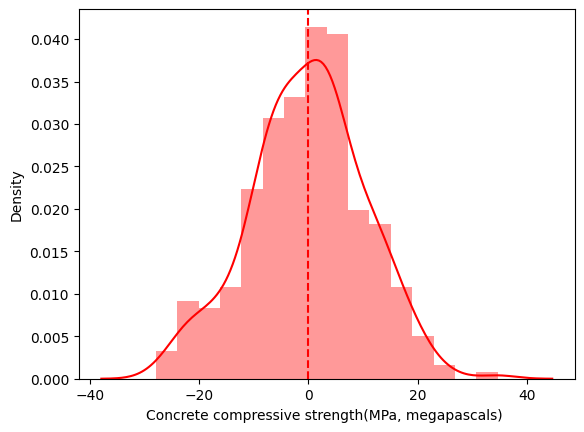

In [120]:
sns.distplot(y_test - y_pred_LR,color='red')
plt.axvline(0,linestyle='--',color='red')

Text(0, 0.5, 'Y_pred')

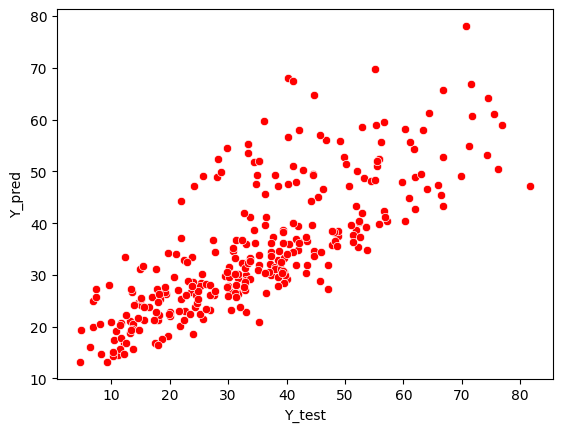

In [121]:
sns.scatterplot(x=y_test, y = y_pred_LR,color='red')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [122]:
# Evalate Coefficient
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [123]:
LR.intercept_

np.float64(-13.616932642237465)

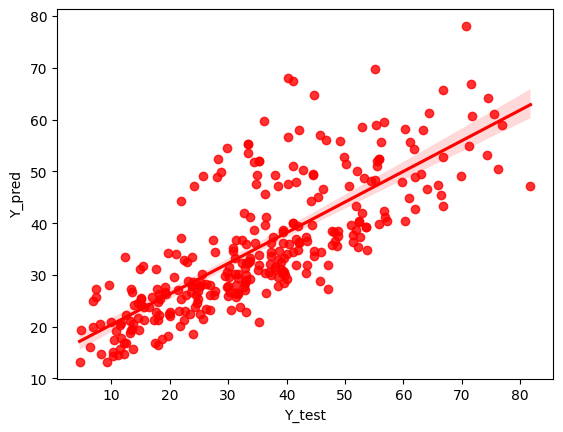

In [124]:
#Model Perforamnce : Linear Regression
sns.regplot(x = y_test,y = y_pred_LR,color='red')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [125]:
#Decesion Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for the Decesion Tree Regressor: ',r2_score(y_test,y_pred_DT))

The Model Accuracy for the Decesion Tree Regressor:  0.8292930044920277


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

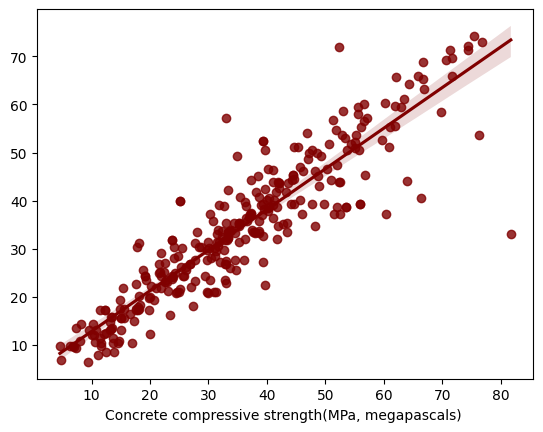

In [126]:
#Model Performance : Decesion Tree
sns.regplot(x = y_test,y = y_pred_DT,color='maroon')

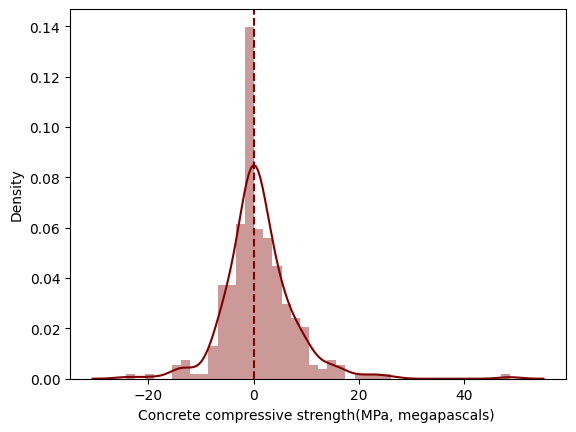

In [127]:
sns.distplot(y_test - y_pred_DT,color='maroon')
plt.axvline(0,linestyle='--',color='maroon')


In [128]:
#Decesion Tree Regressor

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Regressor: ',r2_score(y_test,y_pred_RF))

The Model Accuracy for the Random Forest Regressor:  0.8873848827852767


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

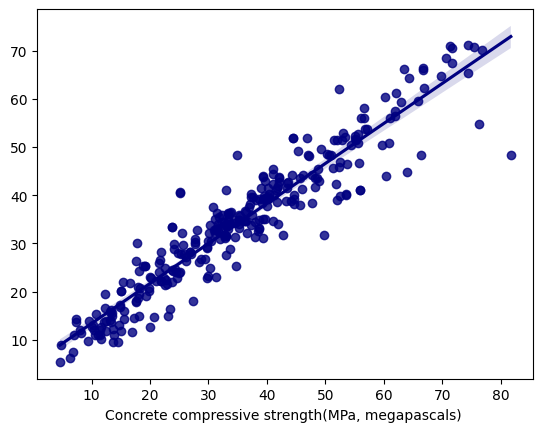

In [129]:
#Model Performance : Random Forest Regressor
sns.regplot(x = y_test,y = y_pred_RF,color='navy')

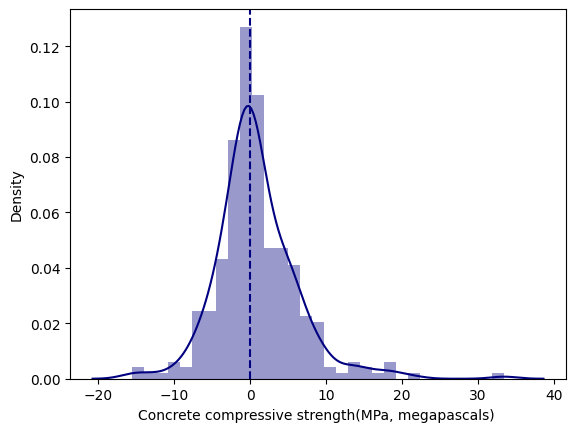

In [130]:
sns.distplot(y_test - y_pred_RF,color='navy')
plt.axvline(0,linestyle='--',color='navy')


In [131]:
Features = RF.feature_importances_

In [132]:
features_names = X.columns
importance_df = pd.Series(Features,index=features_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.330024
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.074977
Fly Ash (component 3)(kg in a m^3 mixture)               0.022092
Water  (component 4)(kg in a m^3 mixture)                0.118567
Superplasticizer (component 5)(kg in a m^3 mixture)      0.060070
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.025504
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.035996
Age (day)                                                0.332770
dtype: float64

In [133]:
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor: ',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor:  0.9104444067517969


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

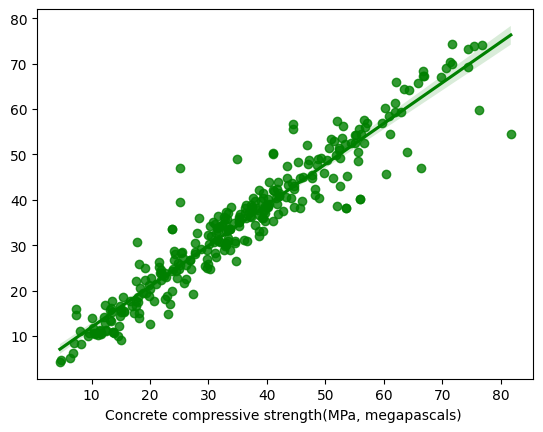

In [134]:
sns.regplot(x = y_test,y = y_pred_xgb,color='green')

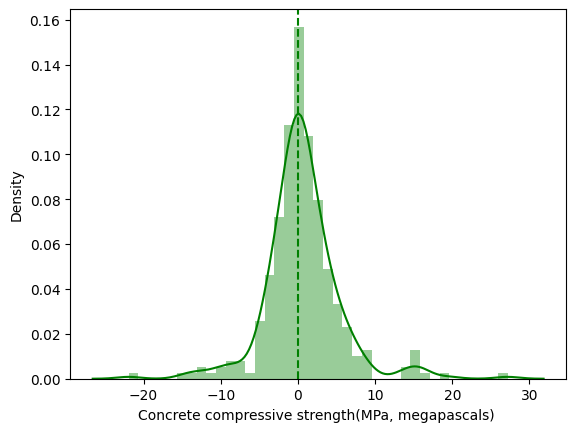

In [135]:
sns.distplot(y_test - y_pred_xgb,color='green')
plt.axvline(0,linestyle='--',color='green')

In [136]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Regressor:',r2_score(y_test,y_pred_ada))

Model Accuracy for ADABoost Regressor: 0.7740131705023895


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

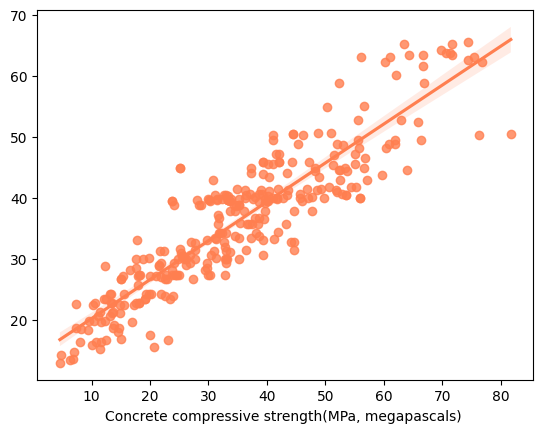

In [137]:
sns.regplot(x = y_test,y = y_pred_ada,color='coral')

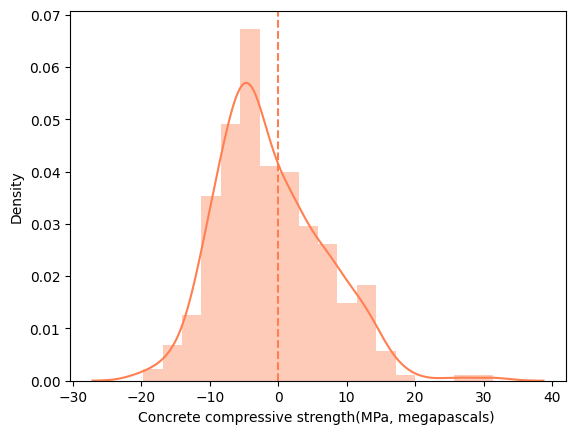

In [138]:
sns.distplot(y_test - y_pred_ada,color='coral')
plt.axvline(0,linestyle='--',color='coral')

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Regressor:',r2_score(y_test,y_pred_gbr))

Model Accuracy for Gradient Boosting Regressor: 0.8907469648316901


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

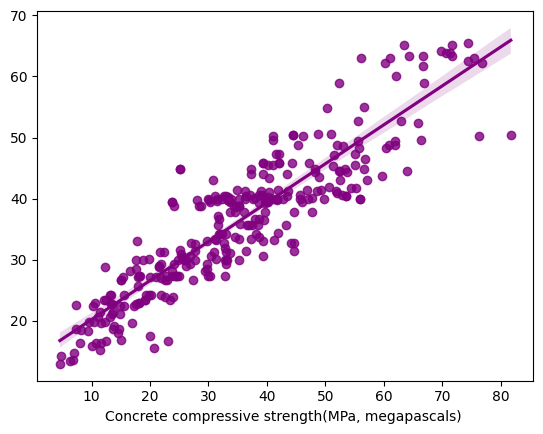

In [140]:
sns.regplot(x = y_test,y = y_pred_ada,color='purple')

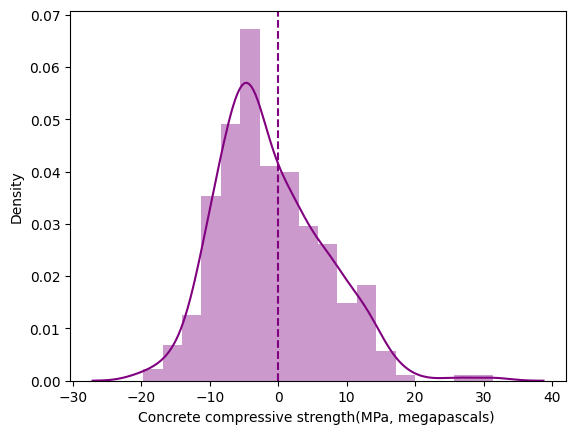

In [141]:
sns.distplot(y_test - y_pred_ada,color='purple')
plt.axvline(0,linestyle='--',color='purple')

In [142]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print('Model Accuracy for KNN Neighbors Regressor:',r2_score(y_test,y_pred_knn))

Model Accuracy for KNN Neighbors Regressor: 0.6431062103165017


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

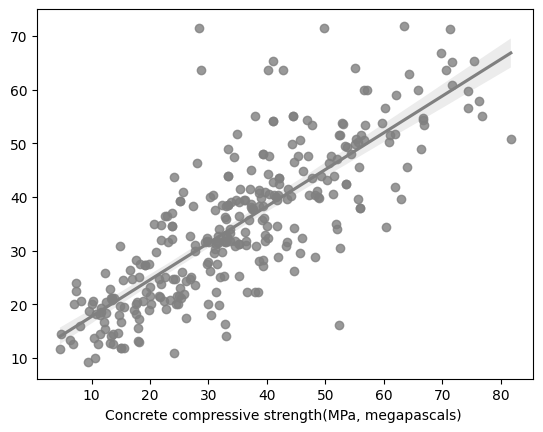

In [143]:
sns.regplot(x = y_test,y = y_pred_knn,color='grey')

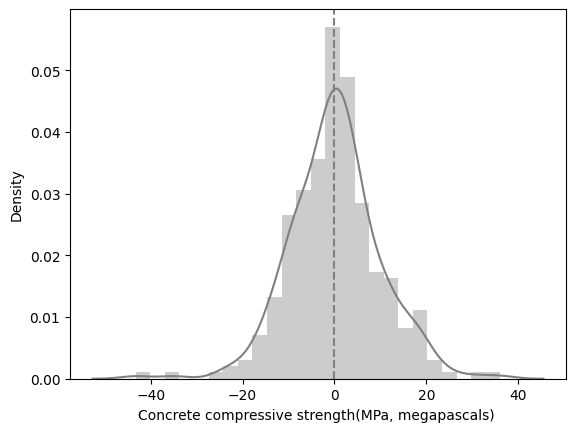

In [144]:
sns.distplot(y_test - y_pred_knn,color='grey')
plt.axvline(0,linestyle='--',color='grey')

In [145]:
#hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestRegressor(random_state=42)

#Define Hyperparameter Grid
param_dist = {
    'n_estimators':[100,200,400,500],
    'max_depth':[None,10,20,40],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

#RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs= -1
)

#Fit to training data
random_search.fit(X_train,y_train)

#Best Model
best_rf = random_search.best_estimator_
print('Best Parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R2 Score on CV: 0.8932201880129401
